In [ ]:
#Importação das bibliotecas necessárias. Essas bibliotecas incluem pandas para manipulação de dados, seaborn e matplotlib para visualização, e várias bibliotecas do scikit-learn para modelagem e avaliação de machine learning
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Carrega o conjunto de dados a partir de um URL e exibe as primeiras linhas e os tipos de dados de cada coluna
df_health = pd.read_csv('https://archive.ics.uci.edu/static/public/887/data.csv', sep=",", encoding='latin-1')
print(df_health.head)
print(df_health.dtypes)

<bound method NDFrame.head of          SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0     73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1     73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2     73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3     73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4     73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   
...       ...       ...       ...       ...     ...     ...     ...     ...   
2273  83711.0     Adult      38.0       2.0     2.0    33.5   100.0     2.0   
2274  83712.0     Adult      61.0       1.0     2.0    30.0    93.0     2.0   
2275  83713.0     Adult      34.0       1.0     2.0    23.7   103.0     2.0   
2276  83718.0     Adult      60.0       2.0     2.0    27.4    90.0     2.0   
2277  83727.0     Adult      26.0       1.0     2.0    24.5   108.0     2.0   

      LBXGLT  LBXIN  

In [ ]:
# Proporção de ausentes em cada atributo:
df_proporcao=df_health.isnull().sum()/len(df_health)
print(df_proporcao)

# Criacao de um DataFrame pandas com o resultado da operacao isnull()
df_isnull = df_health.isnull()

# Contabilizacao dos dados ausentes por atributo
print(df_health.isnull().sum())

SEQN         0.0
age_group    0.0
RIDAGEYR     0.0
RIAGENDR     0.0
PAQ605       0.0
BMXBMI       0.0
LBXGLU       0.0
DIQ010       0.0
LBXGLT       0.0
LBXIN        0.0
dtype: float64
SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64


In [ ]:
# Verificacao de Linhas duplicadas
total_duplicados = df_health.duplicated(keep=False).sum()
print(f'Total de linhas duplicadas: {total_duplicados}')

Total de linhas duplicadas: 0


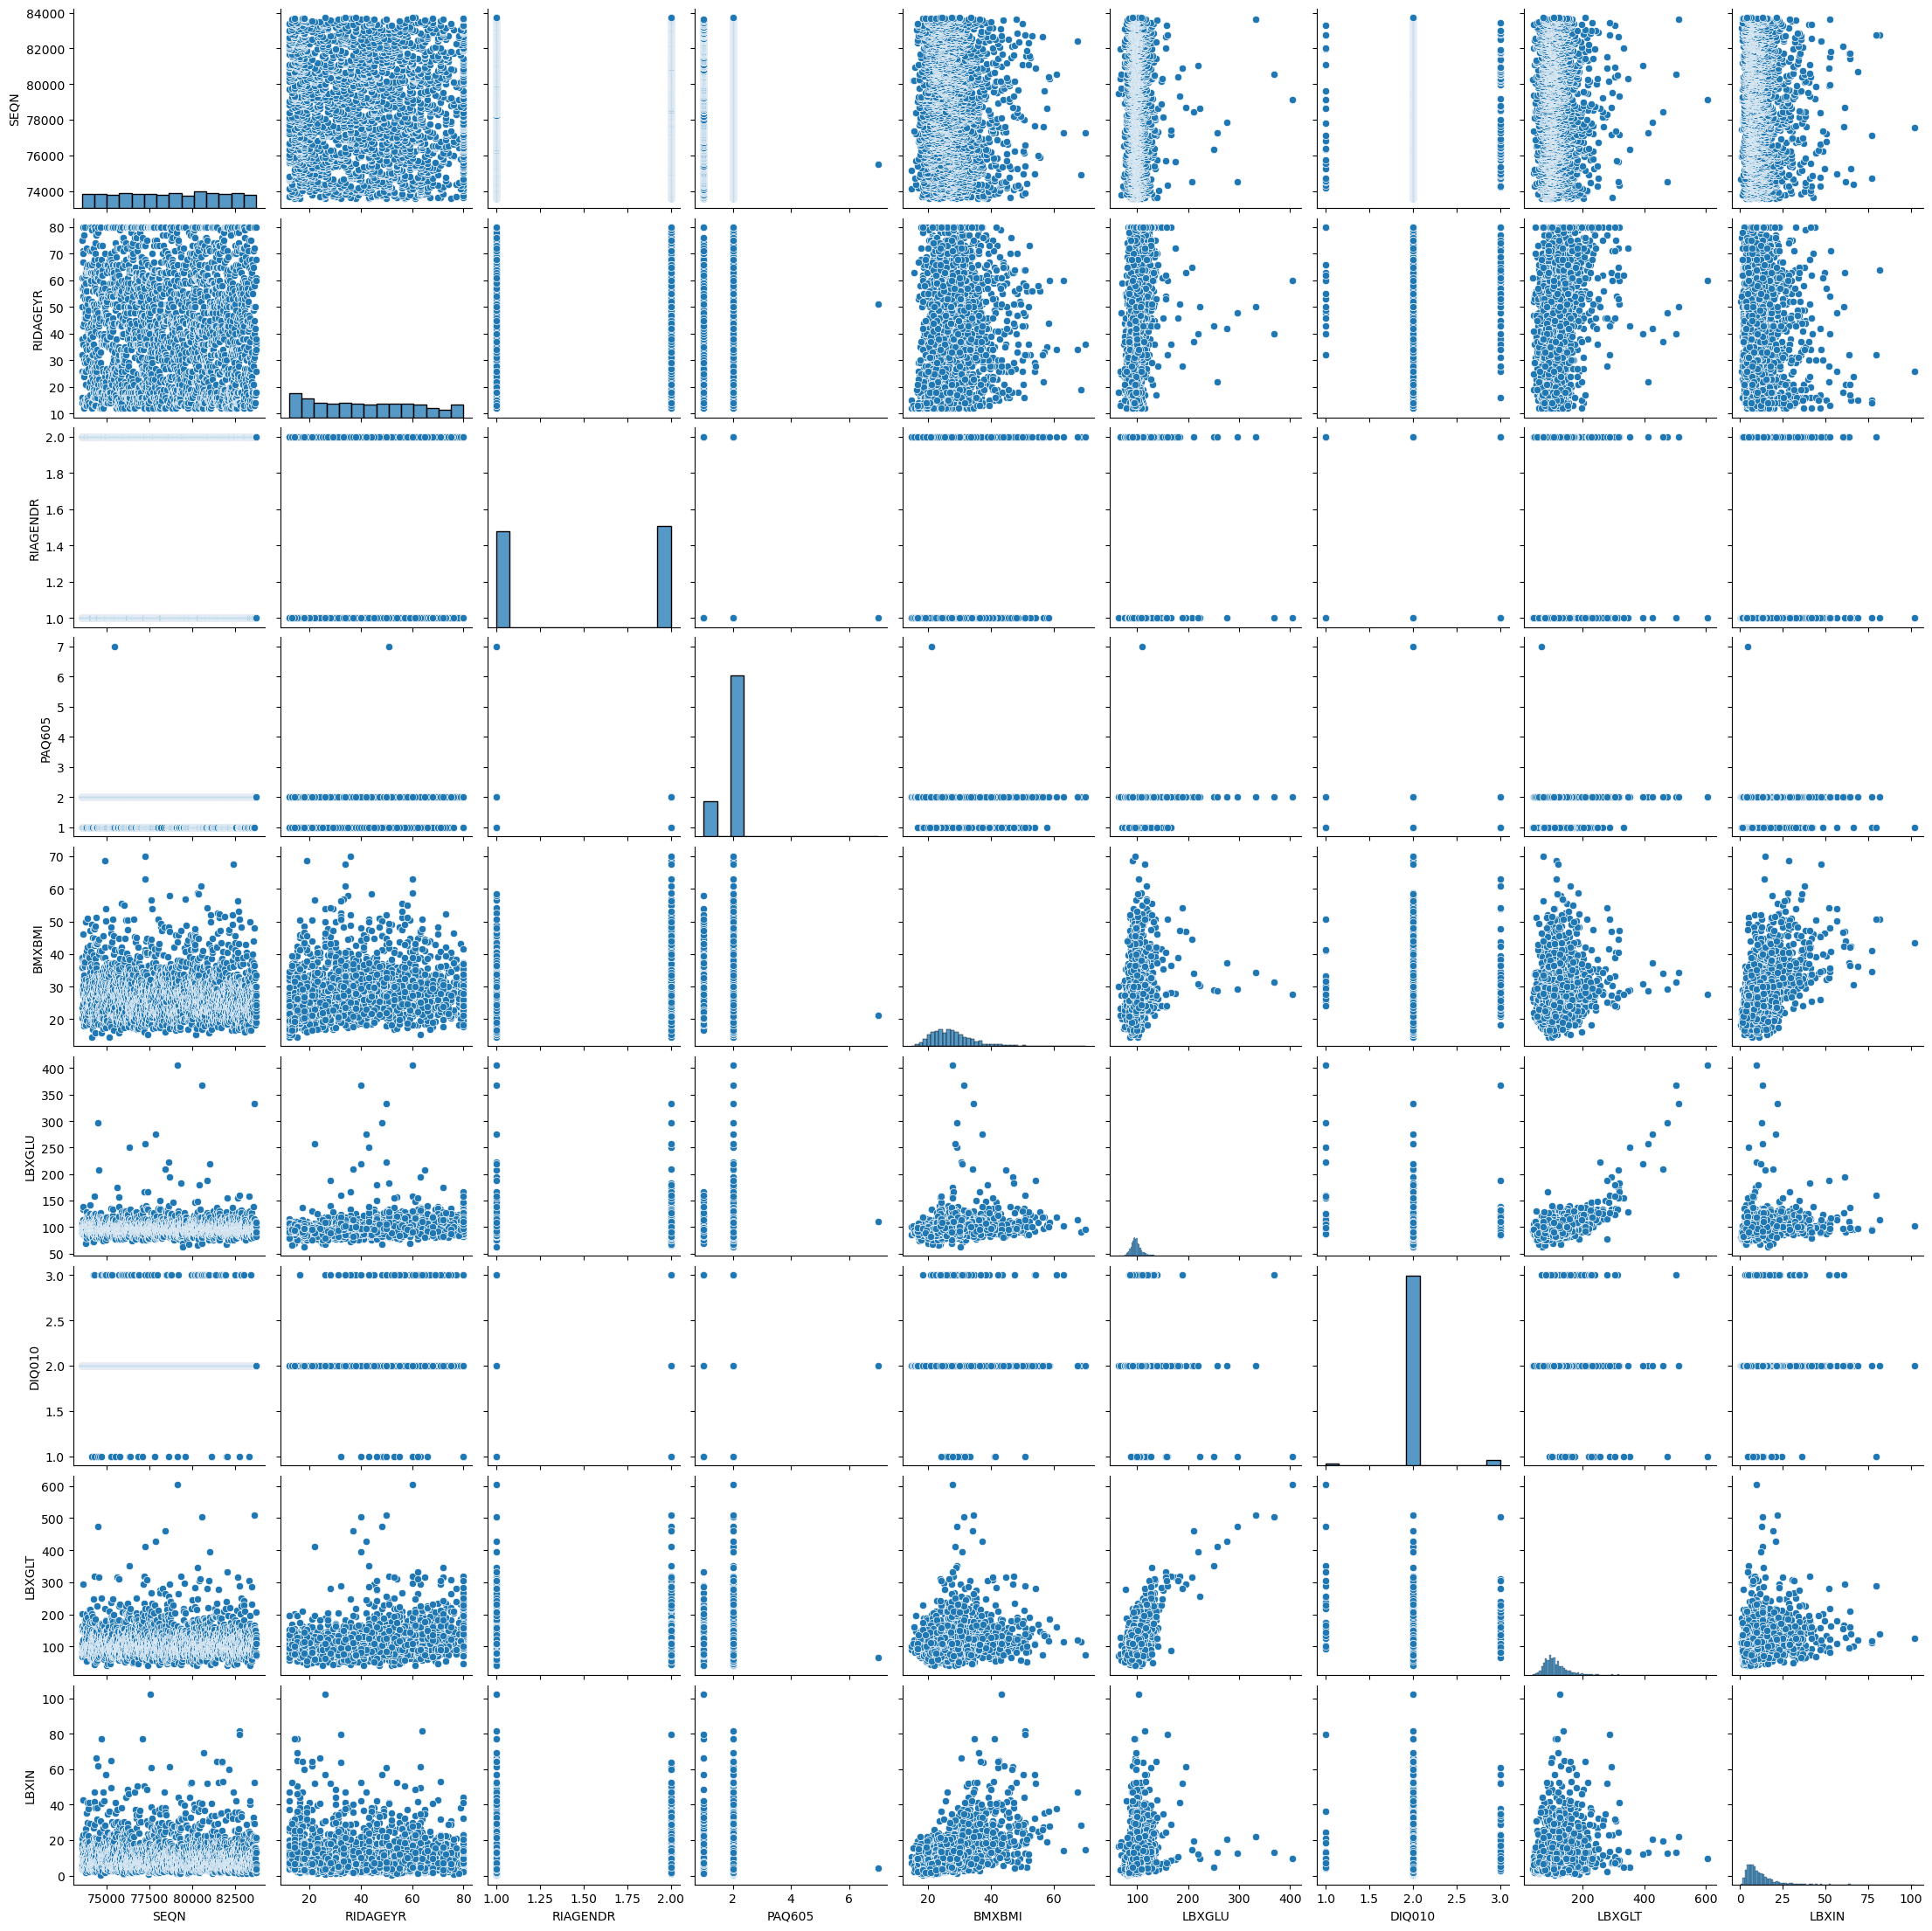

In [7]:
# Gráfico de dispersão - pares de variáveis
sns.pairplot(df_health)
plt.show()

                      SEQN  RIDAGEYR  RIAGENDR    PAQ605    BMXBMI    LBXGLU  \
SEQN              1.000000 -0.008806 -0.012962 -0.019701 -0.061343 -0.004147   
RIDAGEYR         -0.008806  1.000000  0.006398  0.025973  0.147163  0.229624   
RIAGENDR         -0.012962  0.006398  1.000000  0.151076  0.063873 -0.132342   
PAQ605           -0.019701  0.025973  0.151076  1.000000 -0.042935 -0.007849   
BMXBMI           -0.061343  0.147163  0.063873 -0.042935  1.000000  0.208330   
LBXGLU           -0.004147  0.229624 -0.132342 -0.007849  0.208330  1.000000   
DIQ010            0.014102  0.049970 -0.032769 -0.002599  0.047133 -0.004427   
LBXGLT            0.006036  0.318044  0.017406  0.060413  0.193375  0.685579   
LBXIN            -0.040028 -0.091879 -0.016660  0.010011  0.552717  0.211911   
age_group_Adult  -0.018257 -0.684490  0.002767 -0.094789  0.004147 -0.116462   
age_group_Senior  0.018257  0.684490 -0.002767  0.094789 -0.004147  0.116462   

                    DIQ010    LBXGLT   

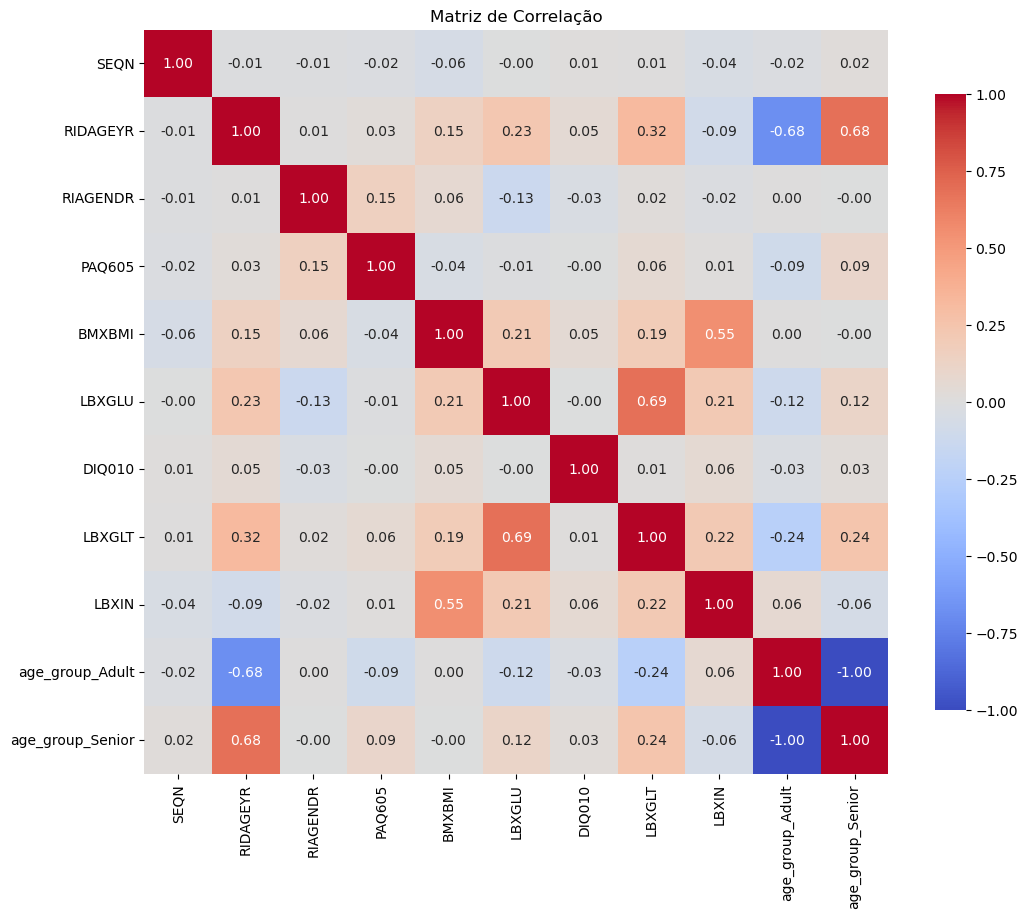

SEQN                float64
RIDAGEYR            float64
RIAGENDR            float64
PAQ605              float64
BMXBMI              float64
LBXGLU              float64
DIQ010              float64
LBXGLT              float64
LBXIN               float64
age_group_Adult        bool
age_group_Senior       bool
dtype: object


In [ ]:
# Correlação
# Usar one-hot encoding para colunas categóricas
df_encoded = pd.get_dummies(df_health, drop_first=False)

# Calcular a matriz de correlação
correlation_matrix = df_encoded.corr()

#correlation_matrix = df_sample.corr()
print(correlation_matrix)

# Criar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlação")
plt.show()

print(df_encoded.dtypes)

In [9]:
# fazer label encode na coluna age_group do df_health
print(df_health['age_group'].unique())

# Criando o LabelEncoder
label_encoder = LabelEncoder()

# Aplicando o Label Encoding na coluna 'age_group'
df_health['age_group_encoded'] = label_encoder.fit_transform(df_health['age_group'])
print(df_health.head())

['Adult' 'Senior']
      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  age_group_encoded  
0   150.0  14.91                  0  
1    80.0   3.85                  0  
2    68.0   6.14                  0  
3    84.0  16.15                  0  
4    81.0  10.92                  0  


In [10]:
# Outliers
print(df_health.columns)

# Avaliacao de outliers 
# Para calcular múltiplos quantis (ex: 0.25, 0.5, 0.75)
print('Coluna com mais correlação com Senior x Adult = LBXGLT:')
quantis_coluna=df_health['LBXGLT'].quantile([0.25, 0.5, 0.75])
print(quantis_coluna)
resumo_coluna=df_health['LBXGLT'].describe()
print(resumo_coluna)

Index(['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI',
       'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN', 'age_group_encoded'],
      dtype='object')
Coluna com mais correlação com Senior x Adult = LBXGLT:
0.25     87.0
0.50    105.0
0.75    130.0
Name: LBXGLT, dtype: float64
count    2278.000000
mean      114.978929
std        47.061239
min        40.000000
25%        87.000000
50%       105.000000
75%       130.000000
max       604.000000
Name: LBXGLT, dtype: float64


In [11]:
# Calcular o intervalo interquartil (IQR)
IQR = quantis_coluna[0.75] - quantis_coluna[0.25]

# Definir os limites inferior e superior
limite_inferior = quantis_coluna[0.25] - 1.5 * IQR
limite_superior = quantis_coluna[0.75] + 1.5 * IQR

# Identificar os outliers
outliers = df_health[(df_health['LBXGLT'] < limite_inferior) | (df_health['LBXGLT'] > limite_superior)]
print(outliers)

# Contar a quantidade de outliers
quantidade_outliers = outliers.shape[0]
print("Quantidade de outliers detectados:", quantidade_outliers)

         SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
6     73587.0     Adult      14.0       1.0     2.0    38.7    94.0     2.0   
14    73639.0    Senior      71.0       1.0     2.0    30.3   133.0     2.0   
55    73816.0     Adult      64.0       1.0     2.0    27.8   129.0     2.0   
82    73975.0     Adult      64.0       2.0     2.0    25.4    90.0     2.0   
93    74033.0    Senior      80.0       1.0     2.0    24.2   142.0     2.0   
...       ...       ...       ...       ...     ...     ...     ...     ...   
2196  83358.0     Adult      37.0       1.0     2.0    36.9   113.0     2.0   
2220  83448.0     Adult      43.0       2.0     1.0    32.8   127.0     2.0   
2221  83450.0    Senior      68.0       1.0     2.0    29.4   118.0     2.0   
2253  83624.0     Adult      50.0       2.0     2.0    34.3   333.0     2.0   
2274  83712.0     Adult      61.0       1.0     2.0    30.0    93.0     2.0   

      LBXGLT  LBXIN  age_group_encoded  
6      202

In [12]:

# Treinamento etc...
# define os atributos dependentes e independente:
X=df_health.drop(columns=['age_group', 'age_group_encoded', 'RIDAGEYR'])
y=df_health['age_group_encoded']

# define o scaler, prepara e executa normalização
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

Melhores parâmetros: {'C': 0.01, 'penalty': 'l1'}
Acurácia no conjunto de teste: 0.8406432748538012
LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

classification report:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       575
           1       0.00      0.00      0.00       109

    accuracy                           0.84       684
   macro avg       0.42      0.50      0.46       684
weighted avg       0.71      0.84      0.77       684



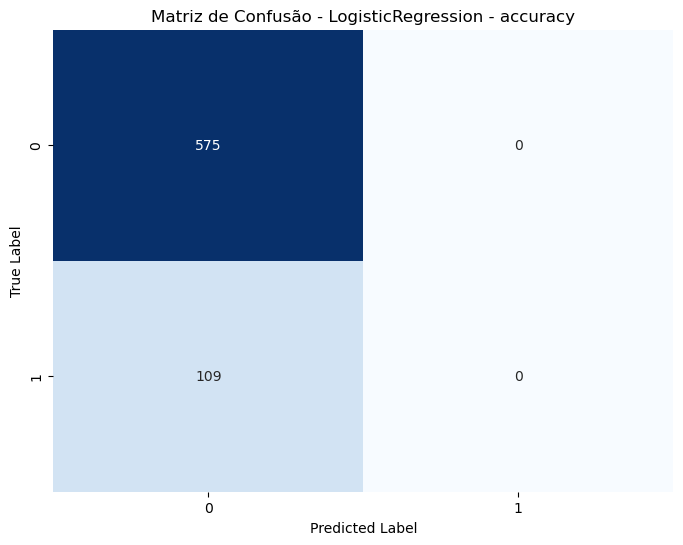

In [13]:
######### TENTATIVA 1 DE REGRESSAO LOGISTICA COM SCORING = ACCURACY
# Logistic regression com grid search:
base_estimator = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularização
    'penalty': ['l1', 'l2']         # Tipos de penalidade
}

# Configurando o GridSearchCV
clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
# Resultados
print("Melhores parâmetros:", clf.best_params_)
print("Acurácia no conjunto de teste:", clf.score(X_test, y_test))
print(clf.best_estimator_)
print('\nclassification report:\n')
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibindo a matriz de confusão com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão - LogisticRegression - accuracy")
plt.show()

Melhores parâmetros com base no F1-score: {'C': 0.01, 'penalty': 'l1'}
F1-score no conjunto de teste: 0.7678631978410415
LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

classification report:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       575
           1       0.00      0.00      0.00       109

    accuracy                           0.84       684
   macro avg       0.42      0.50      0.46       684
weighted avg       0.71      0.84      0.77       684



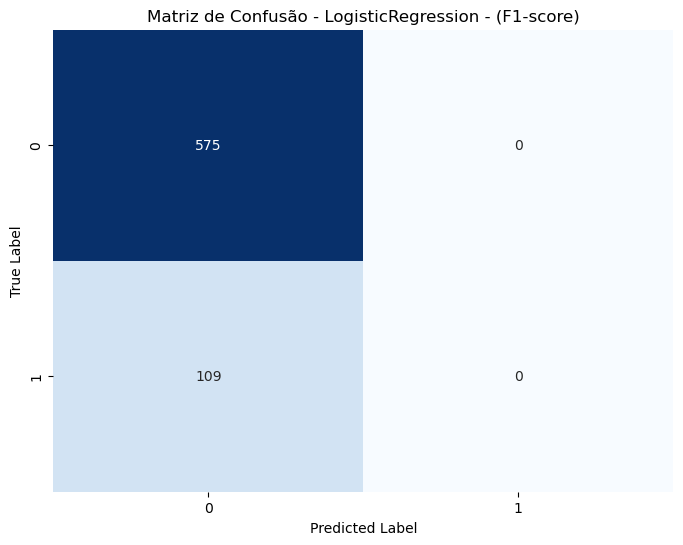

In [14]:
######### TENTATIVA 2 DE REGRESSAO LOGISTICA COM SCORING = F1score
# Logistic regression com grid search usando F1-score como métrica
clf_f1 = GridSearchCV(base_estimator, param_grid, cv=5, scoring='f1_weighted')  # Alterado para f1_weighted
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularização
    'penalty': ['l1', 'l2']         # Tipos de penalidade
}

clf_f1.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros com base no F1-score:", clf_f1.best_params_)
print("F1-score no conjunto de teste:", clf_f1.score(X_test, y_test))
print(clf_f1.best_estimator_)
print('\nclassification report:\n')
y_pred_f1 = clf_f1.predict(X_test)
print(classification_report(y_test, y_pred_f1, zero_division=0))

# Matriz de Confusão
conf_matrix_f1 = confusion_matrix(y_test, y_pred_f1)

# Exibindo a matriz de confusão com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_f1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão - LogisticRegression - (F1-score)")
plt.show()

Melhores parâmetros com base no macro avg recall: {'C': 1, 'penalty': 'l1'}
Melhor estimador: LogisticRegression(C=1, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')
macro avg recall no conjunto de teste: 0.6717750299162346

classification report:

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       575
           1       0.29      0.65      0.40       109

    accuracy                           0.69       684
   macro avg       0.60      0.67      0.59       684
weighted avg       0.81      0.69      0.73       684



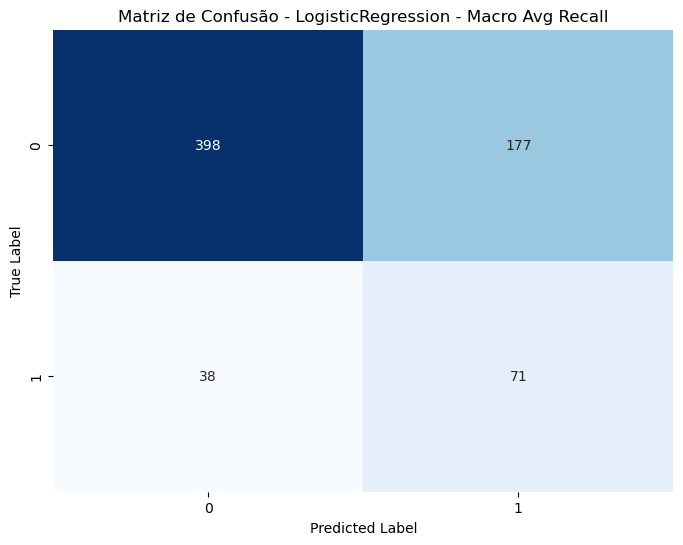

In [15]:
######### TENTATIVA 3 DE REGRESSAO LOGISTICA COM SCORING = Macro
base_estimator = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')

# Grade de hiperparâmetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularização
    'penalty': ['l1', 'l2']         # Tipos de penalidade
}
scorer = make_scorer(recall_score, average='macro')
clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring=scorer)
clf.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros com base no macro avg recall:", clf.best_params_)
print("Melhor estimador:", clf.best_estimator_)
y_pred = clf.predict(X_test)

# Calculando o macro avg recall
macro_recall = recall_score(y_test, y_pred, average='macro')
print("macro avg recall no conjunto de teste:", macro_recall)
print('\nclassification report:\n')
print(classification_report(y_test, y_pred, zero_division=0))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão - LogisticRegression - Macro Avg Recall")
plt.show()

Melhores parâmetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
F1-Score (Macro) no conjunto de teste: 0.6309607802448641

classification report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       575
           1       0.45      0.30      0.36       109

    accuracy                           0.83       684
   macro avg       0.66      0.62      0.63       684
weighted avg       0.81      0.83      0.82       684



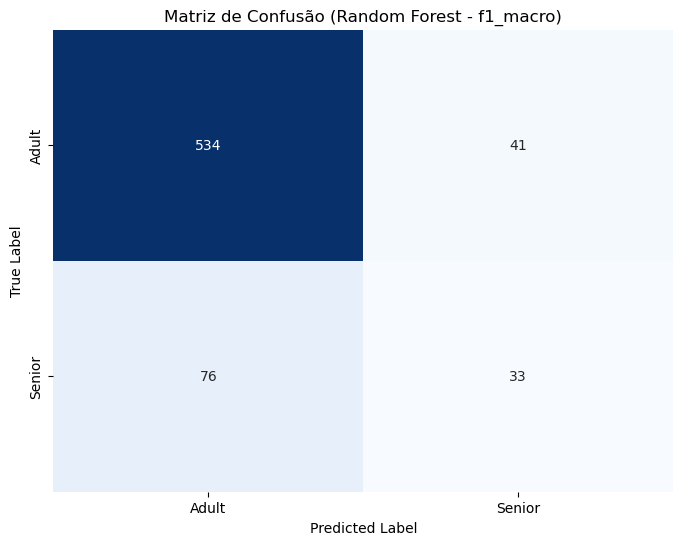

In [16]:
######### TENTATIVA 1 COM RANDOM FOREST com f1_macro
rf = RandomForestClassifier(class_weight='balanced')  # Ajustar o peso das classes
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
clf_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro')
clf_rf.fit(X_train, y_train)
print("Melhores parâmetros:", clf_rf.best_params_)
print("F1-Score (Macro) no conjunto de teste:", clf_rf.score(X_test, y_test))
y_pred_rf = clf_rf.predict(X_test)
print('\nclassification report:\n')
print(classification_report(y_test, y_pred_rf, zero_division=0))

# matriz de confusao no random forest
y_pred_rf = clf_rf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Adult', 'Senior'], yticklabels=['Adult', 'Senior'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão (Random Forest - f1_macro)")
plt.show()

Melhores parâmetros com base no F1-weighted: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
F1-score no conjunto de teste: 0.8097891324611972

classification report:

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       575
           1       0.42      0.29      0.35       109

    accuracy                           0.82       684
   macro avg       0.65      0.61      0.62       684
weighted avg       0.80      0.82      0.81       684



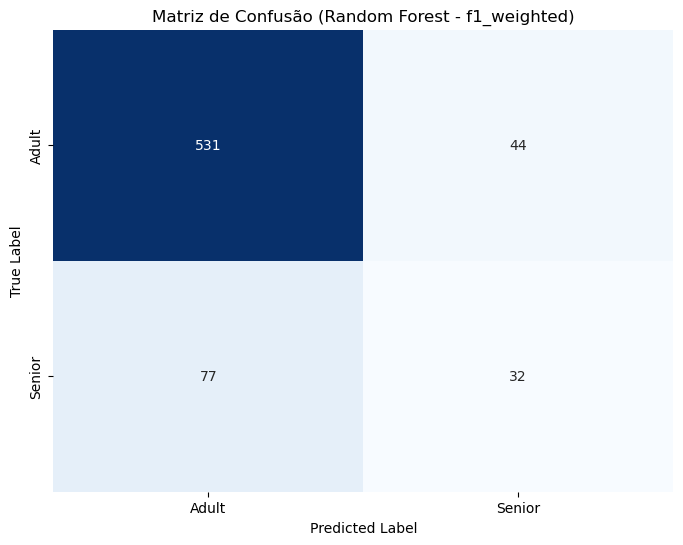

In [17]:
######### TENTATIVA 2 COM RANDOM FOREST com f1_weighted
rf = RandomForestClassifier(class_weight='balanced')  # Ajustar o peso das classes
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
clf_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_weighted')
clf_rf.fit(X_train, y_train)
print("Melhores parâmetros com base no F1-weighted:", clf_rf.best_params_)
print("F1-score no conjunto de teste:", clf_rf.score(X_test, y_test))
y_pred_rf = clf_rf.predict(X_test)
print('\nclassification report:\n')
print(classification_report(y_test, y_pred_rf, zero_division=0))
# matriz de confusao no random forest
y_pred_rf = clf_rf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Adult', 'Senior'], yticklabels=['Adult', 'Senior'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão (Random Forest - f1_weighted)")
plt.show()

Melhores parâmetros com base no F1-score: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1-score no conjunto de teste: 0.7723681114308243

classification report:

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       575
           1       0.28      0.26      0.27       109

    accuracy                           0.78       684
   macro avg       0.57      0.57      0.57       684
weighted avg       0.77      0.78      0.77       684



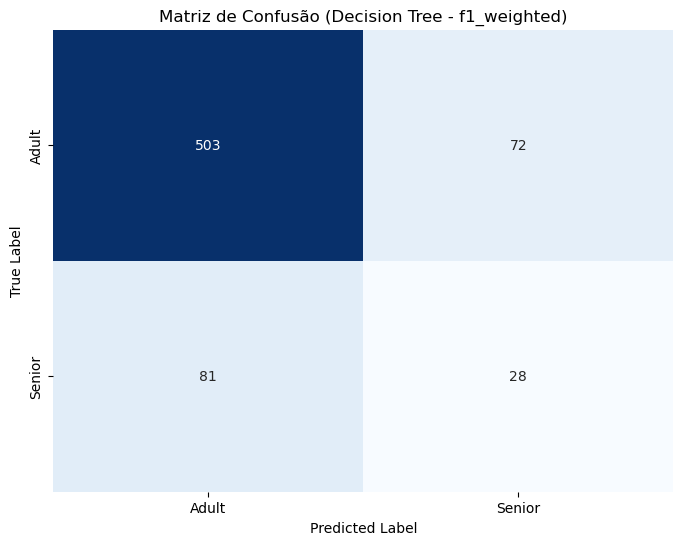

In [18]:
######### TENTATIVA 1 COM DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced')  # Ajustar o peso das classes
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],    # Número mínimo de amostras em um nó folha
}
clf_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1_weighted')
clf_dt.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros com base no F1-score:", clf_dt.best_params_)
print("F1-score no conjunto de teste:", clf_dt.score(X_test, y_test))
y_pred_dt = clf_dt.predict(X_test)

# Relatório de classificação
print('\nclassification report:\n')
print(classification_report(y_test, y_pred_dt, zero_division=0))

# Matriz de Confusão
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Adult', 'Senior'], yticklabels=['Adult', 'Senior'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão (Decision Tree - f1_weighted)")
plt.show()